In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc #맥북 폰트 관리 
import seaborn as sns

In [169]:
import bs4
import folium
import selenium
import time
from selenium import webdriver
from bs4 import BeautifulSoup   
import sys

### Line Chart

In [71]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
#맥북에서 matplotlib를 사용할때 한글이 깨짐을 방지 

In [14]:
df = pd.read_csv('/Users/Moon/Desktop/빅데이터 청년인재/Python/2020-07-08/실습용 자료1/학생별과목별성적_3명.csv',
                 encoding = 'euc-kr')

In [73]:
x_v = df['과목']
y_v = df.loc[df['이름'] == '박지영']['점수']
y_v1 = df.loc[df['이름'] == '김태함']['점수']
y_v2 = df.loc[df['이름'] == '권혁진']['점수']

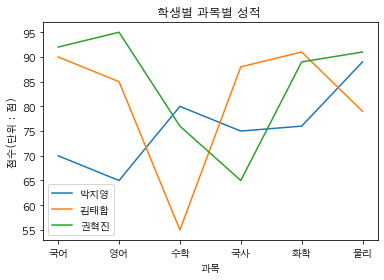

In [90]:
plt.plot(x_v.unique(), y_v)
plt.plot(x_v.unique(), y_v1)
plt.plot(x_v.unique(), y_v2)
plt.title('학생별 과목별 성적 ')
plt.xlabel('과목')
plt.ylabel('점수(단위 : 점)')
plt.legend(['박지영','김태함','권혁진'])
plt.show()


### Bar Chart

In [92]:
df = pd.read_csv('/Users/Moon/Desktop/빅데이터 청년인재/Python/2020-07-08/실습용 자료1/홍길동시험점수.csv',
                 encoding = 'euc-kr')
df

,이름,과목,점수
0,홍길동,영어,90
1,홍길동,수학,70
2,홍길동,국어,85


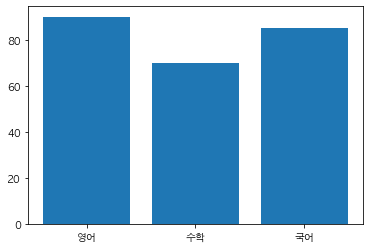

In [93]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x = df['과목']
y = df['점수']

ax.bar(x,y)
plt.show()

In [272]:
df = pd.read_csv('/Users/Moon/Desktop/빅데이터 청년인재/Python/2020-07-08/실습용 자료1/1군전염병발병현황_년도별_2.csv',
                 encoding = 'euc-kr')
df['발생건수'] = df['콜레라'] + df['장티푸스'] + df['이질'] + df['대장균']
df

,년도,콜레라,장티푸스,이질,대장균,발생건수
0,2002년,4,221,767,8,1000
1,2003년,1,199,1117,52,1369
2,2004년,10,174,487,118,789
3,2005년,16,219,317,43,595
4,2006년,5,200,389,37,631
5,2007년,7,223,131,41,402
6,2008년,5,188,209,58,460
7,2009년,0,168,180,62,410
8,2010년,8,133,228,56,425
9,2011년,3,148,171,71,393


In [287]:
x = df.index
y1,y2,y3,y4 = df['콜레라'], df['장티푸스'], df['이질'], df['대장균']

In [286]:
df.index

RangeIndex(start=0, stop=11, step=1)

In [281]:
df['년도'].replace()

0     2002년
1     2003년
2     2004년
3     2005년
4     2006년
5     2007년
6     2008년
7     2009년
8     2010년
9     2011년
10    2012년
Name: 년도, dtype: object

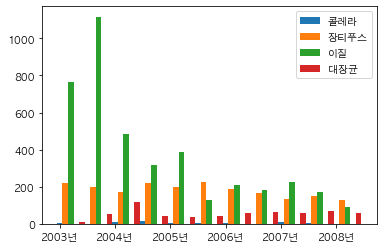

In [336]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)


w = 0.2
ax.bar(x,y1 ,width = 0.2,label = '콜레라')
ax.bar(x+w,y2 ,width = 0.2,label = '장티푸스')
ax.bar(x+w*2,y3 ,width = 0.2,label = '이질')
ax.bar(x+w*4,y4 ,width = 0.2,label = '대장균 ')
# ax.set_xlabel('2002년 2003년 2004년 2005년 2006년 2007년 2008년 2009년 2010년 2011년 2012년')
# ax.set_xticklabels(['2002년', '2003년' ,'2004년', '2005년', '2006년', '2007년', '2008년', '2009년', '2010년', '2011년', '2012년'])
ax.set_xticklabels(df['년도'])
ax.legend()


plt.show()
#set_xticklabels : x축에 라벨지정 

### Folium

In [263]:
df = pd.read_csv('/Users/Moon/Desktop/빅데이터 청년인재/Python/2020-07-08/실습용 자료1/경주주요관광지_LAT_LON.csv', encoding = 'euc-kr', index_col = 'no')
df

,name,lon,lat,freq
no,,,,
1,경주안압지,129.226560,35.834761,150
2,경주테디베어박물관,129.276937,35.851840,104
3,경주첨성대,129.219063,35.834683,120
4,경주불국사,129.332092,35.790097,100
5,경주보문단지,129.286332,35.842679,80
6,경주석굴암,129.349698,35.795086,54
7,경주천마총,129.210387,35.838736,47
8,경주엑스포광장,129.286146,35.830168,35


In [266]:
df.iloc[:,2][1]

35.834761

In [268]:
m = folium.Map(location = [df.iloc[:,2][1],df.iloc[:,3][1]], zoom_start = 14)
folium.Marker(location = [df.iloc[:,2][1],df.iloc[:,3][1]], popup = '여긴어디?',
             icon = folium.Icon(icon = 'cloud')).add_to(m)
m
#안되서 패스 

### Crawling

In [143]:
query_txt = input('해당 홈페이지에서 크롤링할 키워드 :')

driver = webdriver.Chrome('/Users/Moon/Desktop/빅데이터 청년인재/chromedriver_mac64/chromedriver')
#크롬 드라이버가 있는 경로를 설정 

driver.implicitly_wait(5)
time.sleep(5)
#위 페이지가 모두 열릴 때까지 2초 기다림(중요)
#페이지가 열릴때까지 기다려
#에러가 발생하면 숫자를 바꾸면 된다

driver.get("https://naver.co.kr")
#크롤링을 하고자 하는 웹페이지를 설정


try :
    driver.find_element_by_xpath('//*[@id="safetyStay1"]/div/div/div/button').click()
#xpath : name과 id도 모를때 사용하며
#홈페이지에서 누르고자 하는 부분의 html코드 -> 마우스 오른쪽 버튼 선택 -> copy선택 -> copyxpath선택 -> 복사해서 그대로 붙여넣으면 된다
#xpath가 전부 정확한건 아니므로 name,id가 존재하면 사용하지 않아야한다

except :
    print("알림창이 없습니다")
    
#Step 2. 검색창의 이름을 찾아서 검색어를 입력합니다
driver.find_element_by_class_name("green_window").click()
#우선 f12를 누르고 id나 name을 찾아야한다 
#해당 홈페이지의 검색에 해당하는 코드

element = driver.find_element_by_id("query")
#위의 방법과 똑같음


element.send_keys(query_txt)
#찾고 싶은 내용 선택 
element.send_keys("\n")
#엔터치라는것 

#Step 3. 검색 버튼을 눌러 실행합니다

#밑의 3개는 3개중에 1개만 사용해도 됨
#link_text : 특정 글자를 눌러주는 함수 
# driver.find_element_by_link_text("블로그 ").click()
# driver.find_element_by_link_text("검색").click()
# driver.find_element_by_class_name("btn_search2").click()  # class name 으로도 가능합니다.
# driver.find_element_by_xpath('//*[@id="gnbMain"]/div/div/div[1]/div[1]/a').click()   # xpath 로도 가능합니다.

해당 홈페이지에서 크롤링할 키워드 :봄여행
알림창이 없습니다


In [167]:
query_txt = input('해당 홈페이지에서 크롤링할 키워드 :')

driver = webdriver.Chrome('/Users/Moon/Desktop/빅데이터 청년인재/chromedriver_mac64/chromedriver')
#크롬 드라이버가 있는 경로를 설정 

driver.implicitly_wait(5)
time.sleep(5)
#위 페이지가 모두 열릴 때까지 2초 기다림(중요)
#페이지가 열릴때까지 기다려
#에러가 발생하면 숫자를 바꾸면 된다

driver.get("https://www.daum.net/")
#크롤링을 하고자 하는 웹페이지를 설정


try :
    driver.find_element_by_xpath('//*[@id="safetyStay1"]/div/div/div/button').click()
#xpath : name과 id도 모를때 사용하며
#홈페이지에서 누르고자 하는 부분의 html코드 -> 마우스 오른쪽 버튼 선택 -> copy선택 -> copyxpath선택 -> 복사해서 그대로 붙여넣으면 된다
#xpath가 전부 정확한건 아니므로 name,id가 존재하면 사용하지 않아야한다

except :
    print("알림창이 없습니다")
    
#Step 2. 검색창의 이름을 찾아서 검색어를 입력합니다
driver.find_element_by_class_name("inner_search").click()
#우선 f12를 누르고 id나 name을 찾아야한다 
#해당 홈페이지의 검색에 해당하는 코드

element = driver.find_element_by_class_name("tf_keyword")
#위의 방법과 똑같음


element.send_keys(query_txt)
#찾고 싶은 내용 선택 
element.send_keys("\n")
#엔터치라는것 

#Step 3. 검색 버튼을 눌러 실행합니다

#밑의 3개는 3개중에 1개만 사용해도 됨
#link_text : 특정 글자를 눌러주는 함수 
# driver.find_element_by_link_text("블로그 ").click()
# driver.find_element_by_link_text("검색").click()
# driver.find_element_by_class_name("btn_search2").click()  # class name 으로도 가능합니다.
# driver.find_element_by_xpath('//*[@id="gnbMain"]/div/div/div[1]/div[1]/a').click()   # xpath 로도 가능합니다.

#네이버와 다음이 중요한게 우선 검색창을 클릭하고 이후 엔터로 지정을 했으니 세부적인 검색창에 input했던 것들이 갈 수 있도록 해주는게 포인트 


해당 홈페이지에서 크롤링할 키워드 :봄여행
알림창이 없습니다


In [166]:
query_txt = input('해당 홈페이지에서 크롤링할 키워드 :')

driver = webdriver.Chrome('/Users/Moon/Desktop/빅데이터 청년인재/chromedriver_mac64/chromedriver')
#크롬 드라이버가 있는 경로를 설정 

driver.implicitly_wait(5)
time.sleep(5)
#위 페이지가 모두 열릴 때까지 2초 기다림(중요)
#페이지가 열릴때까지 기다려
#에러가 발생하면 숫자를 바꾸면 된다

driver.get("https://www.google.com/")
#크롤링을 하고자 하는 웹페이지를 설정


try :
    driver.find_element_by_xpath('//*[@id="safetyStay1"]/div/div/div/button').click()
#xpath : name과 id도 모를때 사용하며
#홈페이지에서 누르고자 하는 부분의 html코드 -> 마우스 오른쪽 버튼 선택 -> copy선택 -> copyxpath선택 -> 복사해서 그대로 붙여넣으면 된다
#xpath가 전부 정확한건 아니므로 name,id가 존재하면 사용하지 않아야한다

except :
    print("알림창이 없습니다")
    
#Step 2. 검색창의 이름을 찾아서 검색어를 입력합니다
driver.find_element_by_class_name("SDkEP").click()
#우선 f12를 누르고 id나 name을 찾아야한다 
#해당 홈페이지의 검색에 해당하는 코드

element = driver.find_element_by_name("q")
#위의 방법과 똑같음

element.send_keys(query_txt)
#찾고 싶은 내용 선택 
element.send_keys("\n")
#엔터치라는것 

#Step 3. 검색 버튼을 눌러 실행합니다

#밑의 3개는 3개중에 1개만 사용해도 됨
#link_text : 특정 글자를 눌러주는 함수 
# driver.find_element_by_link_text("블로그 ").click()
# driver.find_element_by_link_text("검색").click()
# driver.find_element_by_class_name("btn_search2").click()  # class name 으로도 가능합니다.
# driver.find_element_by_xpath('//*[@id="gnbMain"]/div/div/div[1]/div[1]/a').click()   # xpath 로도 가능합니다.

#네이버와 다음이 중요한게 우선 검색창을 클릭하고 이후 엔터로 지정을 했으니 세부적인 검색창에 input했던 것들이 갈 수 있도록 해주는게 포인트 
#검색창의 큰부분을 찾고 input으로 입력할 단어를 부분을 찾아서 지정해주면 됨 


해당 홈페이지에서 크롤링할 키워드 :봄여행
알림창이 없습니다


### BeautifulSoup

In [361]:
with open('/Users/Moon/Desktop/빅데이터 청년인재/Python/2020-07-08/실습용 자료1/data1/bs연습문제.html', encoding = 'cp949')as ex:
    soup = BeautifulSoup(ex, 'html.parser')

In [362]:
soup

<!DOCTYPE html>

<html lang="ko" prefix="og: http://ogp.me/ns#" xmlns="http://www.w3.org/1999/xhtml"><head><meta charset="utf-8"/>
<script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></script><script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-5CF9ZN"></script><script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],j=d.createElement(s),dl=l!='dataLayer'?'&amp;l='+l:'';j.async=true;j.src='https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);})(window,document,'script','dataLayer','GTM-5CF9ZN');</script>
<link href="https://pixabay.com/ko/images/search/%EA%B3%A0%EC%96%91%EC%9D%B4/" rel="canonical"/>
<link href="https://pixabay.com/cs/images/search/%EA%B3%A0%EC%96%91%EC%9D%B4/" hreflang="cs" rel="alternate"/><link href="https://pixabay.com/da/images/search/%EA%B3%A0%EC%96%91%EC%9D%B4/" hreflang="da" rel="alternate"/><link h

In [190]:
img_src = soup.find('div', 'flex_grid credits search_results').find_all('img')
print(len(img_src))
#해당 태그만 전부 추출 

In [219]:
img_src
#추출된 것을 확인

[<img alt="고양이, 젊은 동물, 호기심, 살쾡이, 동물" src="https://cdn.pixabay.com/photo/2017/02/20/18/03/cat-2083492__340.jpg" srcset="https://cdn.pixabay.com/photo/2017/02/20/18/03/cat-2083492__340.jpg 1x, https://cdn.pixabay.com/photo/2017/02/20/18/03/cat-2083492__480.jpg 2x"/>,
 <img alt="고양이, 동물, 고양이 눈, 눈, 애완 동물, 보기, 파란 눈" src="https://cdn.pixabay.com/photo/2016/03/28/12/35/cat-1285634__340.png" srcset="https://cdn.pixabay.com/photo/2016/03/28/12/35/cat-1285634__340.png 1x, https://cdn.pixabay.com/photo/2016/03/28/12/35/cat-1285634__480.png 2x"/>,
 <img alt="고양이, 실루엣, 고양이 실루엣, 고양이 눈, 검은 고양이" src="https://cdn.pixabay.com/photo/2015/03/27/13/16/cat-694730__340.jpg" srcset="https://cdn.pixabay.com/photo/2015/03/27/13/16/cat-694730__340.jpg 1x, https://cdn.pixabay.com/photo/2015/03/27/13/16/cat-694730__480.jpg 2x"/>,
 <img alt="고양이, 동물, 고양이 초상화, 고양이 눈, 호랑이 고양이, 국내 고양이" src="https://cdn.pixabay.com/photo/2016/07/10/21/47/cat-1508613__340.jpg" srcset="https://cdn.pixabay.com/photo/2016/07/10/21/47/cat-1

In [249]:
img_src_2017 = []
img_src_2018 = []
for i in range(len(img_src)):
    if img_src[i]['src'].split('/')[4] == '2017':
        img_src_2017.append(img_src[i]['src'])
    elif img_src[i]['src'].split('/')[4] == '2018':
        img_src_2018.append(img_src[i]['src'])

#img_src에서 각 행마다 src를 뽑아 '/'를 기준으로 분리하고 조건문을 사용하여 빈 리스트에 추가 

In [255]:
print('2017년 데이터는 총 %s건 입니다.' %len(img_src_2017))
for i in img_src_2017:
    print(i)

2017년 데이터는 총 20건 입니다.
https://cdn.pixabay.com/photo/2017/02/20/18/03/cat-2083492__340.jpg
https://cdn.pixabay.com/photo/2017/11/14/13/06/kitty-2948404__340.jpg
https://cdn.pixabay.com/photo/2017/07/24/19/57/tiger-2535888__340.jpg
https://cdn.pixabay.com/photo/2017/11/06/09/53/animal-2923186__340.jpg
https://cdn.pixabay.com/photo/2017/07/25/01/22/cat-2536662__340.jpg
https://cdn.pixabay.com/photo/2017/05/17/12/42/tiger-2320819__340.jpg
https://cdn.pixabay.com/photo/2017/11/09/21/41/cat-2934720__340.jpg
https://cdn.pixabay.com/photo/2017/12/09/21/33/sunset-3008779__340.jpg
https://cdn.pixabay.com/photo/2017/03/14/14/49/cat-2143332__340.jpg
https://cdn.pixabay.com/photo/2017/08/23/08/33/cats-eyes-2671903__340.jpg
https://cdn.pixabay.com/photo/2017/12/11/15/34/lion-3012515__340.jpg
https://cdn.pixabay.com/photo/2017/04/30/18/33/cat-2273598__340.jpg
https://cdn.pixabay.com/photo/2017/11/13/07/14/cat-eyes-2944820__340.jpg
https://cdn.pixabay.com/photo/2017/10/30/19/41/puma-2903312__340.jpg
h

In [256]:
print('2018년 데이터는 총 %s건 입니다.' %len(img_src_2018))
for i in img_src_2018:
    print(i)

2018년 데이터는 총 18건 입니다.
https://cdn.pixabay.com/photo/2018/07/31/22/08/lion-3576045__340.jpg
https://cdn.pixabay.com/photo/2018/03/26/20/49/tiger-3264048__340.jpg
https://cdn.pixabay.com/photo/2018/01/25/14/12/nature-3106213__340.jpg
https://cdn.pixabay.com/photo/2018/01/28/12/37/cat-3113513__340.jpg
https://cdn.pixabay.com/photo/2018/05/04/16/50/cat-3374422__340.jpg
https://cdn.pixabay.com/photo/2018/04/13/21/24/lion-3317670__340.jpg
https://cdn.pixabay.com/photo/2018/07/08/14/16/cat-3523992__340.jpg
https://cdn.pixabay.com/photo/2018/01/04/18/58/cats-3061372__340.jpg
https://cdn.pixabay.com/photo/2018/11/29/23/34/cat-3846780__340.jpg
https://cdn.pixabay.com/photo/2018/07/13/10/20/cat-3535404__340.jpg
https://cdn.pixabay.com/photo/2018/05/03/22/34/lion-3372720__340.jpg
https://cdn.pixabay.com/photo/2018/06/03/08/57/cat-3449999__340.jpg
https://cdn.pixabay.com/photo/2018/03/27/17/25/cat-3266673__340.jpg
https://cdn.pixabay.com/photo/2018/03/26/02/05/cat-3261420__340.jpg
https://cdn.pixab

### 텍스트 추출 및 저장 

##### Naver

In [386]:
query_txt = input('해당 홈페이지에서 크롤링할 키워드 :')
f_name = input("저장 경로")
driver = webdriver.Chrome('/Users/Moon/Desktop/빅데이터 청년인재/chromedriver_mac64/chromedriver')
#크롬 드라이버가 있는 경로를 설정 

driver.implicitly_wait(5)
time.sleep(5)
#위 페이지가 모두 열릴 때까지 2초 기다림(중요)
#페이지가 열릴때까지 기다려
#에러가 발생하면 숫자를 바꾸면 된다

driver.get("https://naver.co.kr")
#크롤링을 하고자 하는 웹페이지를 설정


try :
    driver.find_element_by_xpath('//*[@id="safetyStay1"]/div/div/div/button').click()
#xpath : name과 id도 모를때 사용하며
#홈페이지에서 누르고자 하는 부분의 html코드 -> 마우스 오른쪽 버튼 선택 -> copy선택 -> copyxpath선택 -> 복사해서 그대로 붙여넣으면 된다
#xpath가 전부 정확한건 아니므로 name,id가 존재하면 사용하지 않아야한다

except :
    print("알림창이 없습니다")
    
#Step 2. 검색창의 이름을 찾아서 검색어를 입력합니다
driver.find_element_by_class_name("green_window").click()
#우선 f12를 누르고 id나 name을 찾아야한다 
#해당 홈페이지의 검색에 해당하는 코드

element = driver.find_element_by_id("query")
#위의 방법과 똑같음


element.send_keys(query_txt)
#찾고 싶은 내용 선택 
element.send_keys("\n")
#엔터치라는것 

driver.find_element_by_link_text("블로그").click()
#블로그까지 들어가는 것을 확인 

#현 페이지 있는 내용을 화면에 출력 
time.sleep(1)

full_html = driver.page_source

soup = BeautifulSoup(full_html, 'html.parser')

content_list = soup.find('ul', class_ = 'type01').find_all(class_ = 'sh_blog_top')
#뽑고자 하는 부분의 클래스를 찾고 적어주면 완료 
#이후 find_all에서 뽑고자 하는 페이지의 class를 지정해주면 추출완료 

for i in content_list:
    print(i.text.strip())
    print('\n')
# driver.find_element_by_link_text("블로그").click()
#driver.page_source : 브라우저에 보이는 그대로의 HTML

#txt에 저장 
orig_stdout = sys.stdout
f = open(f_name, 'a', encoding = 'UTF-8')
sys.stdout = f
time.sleep(2)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
content_list = soup.find('ul', class_ = 'type01').find_all(class_ = 'sh_blog_top')

for i in content_list:
    print(i.text.strip())
    print('\n')
    
sys.stdout = orig_stdout
f.close()

# /Users/Moon/Desktop/빅데이터 청년인재/웹 크롤링 /크롤링 저장 /text1.txt <- 저장경로
print('작업완료')

해당 홈페이지에서 크롤링할 키워드 :봄여행
저장 경로/Users/Moon/Desktop/빅데이터 청년인재/웹 크롤링 /크롤링 저장 /text1.txt


##### Daum

In [384]:
query_txt = input('해당 홈페이지에서 크롤링할 키워드 :')
f_name = input("저장 경로")
driver = webdriver.Chrome('/Users/Moon/Desktop/빅데이터 청년인재/chromedriver_mac64/chromedriver')
#크롬 드라이버가 있는 경로를 설정 

driver.implicitly_wait(5)
time.sleep(5)
#위 페이지가 모두 열릴 때까지 2초 기다림(중요)
#페이지가 열릴때까지 기다려
#에러가 발생하면 숫자를 바꾸면 된다

driver.get("https://search.daum.net/")
#크롤링을 하고자 하는 웹페이지를 설정


try :
    driver.find_element_by_xpath('//*[@id="safetyStay1"]/div/div/div/button').click()
#xpath : name과 id도 모를때 사용하며
#홈페이지에서 누르고자 하는 부분의 html코드 -> 마우스 오른쪽 버튼 선택 -> copy선택 -> copyxpath선택 -> 복사해서 그대로 붙여넣으면 된다
#xpath가 전부 정확한건 아니므로 name,id가 존재하면 사용하지 않아야한다

except :
    print("알림창이 없습니다")
    
#Step 2. 검색창의 이름을 찾아서 검색어를 입력합니다
driver.find_element_by_class_name("inner_search").click()
#우선 f12를 누르고 id나 name을 찾아야한다 
#해당 홈페이지의 검색에 해당하는 코드

element = driver.find_element_by_class_name("tf_keyword")
#위의 방법과 똑같음


element.send_keys(query_txt)
#찾고 싶은 내용 선택 
element.send_keys("\n")
#엔터치라는것 

driver.find_element_by_link_text("블로그").click()
#블로그까지 들어가는 것을 확인 

#현 페이지 있는 내용을 화면에 출력 
time.sleep(1)

full_html = driver.page_source

soup = BeautifulSoup(full_html, 'html.parser')

content_list = soup.find(id = 'daumContent').find_all('div',class_ = 'wrap_cont')
#뽑고자 하는 부분의 클래스를 찾고 적어주면 완료 
#이후 find_all에서 뽑고자 하는 페이지의 class를 지정해주면 추출완료 

for i in content_list:
    print(i.text.strip())
    print('\n')
# driver.find_element_by_link_text("블로그").click()
#driver.page_source : 브라우저에 보이는 그대로의 HTML

#txt에 저장 
orig_stdout = sys.stdout
f = open(f_name, 'a', encoding = 'UTF-8')
sys.stdout = f
time.sleep(2)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
content_list = soup.find(id = 'daumContent').find_all('div',class_ = 'wrap_cont')

for i in content_list:
    print(i.text.strip())
    print('\n')
    
sys.stdout = orig_stdout
f.close()

# /Users/Moon/Desktop/빅데이터 청년인재/웹 크롤링 /크롤링 저장 /text1.txt <- 네이버 저장경로 
# /Users/Moon/Desktop/빅데이터 청년인재/웹 크롤링 /크롤링 저장 /text2.txt <- 다음 저장경로
print('작업완료')

해당 홈페이지에서 크롤링할 키워드 :봄여행
저장 경로/Users/Moon/Desktop/빅데이터 청년인재/웹 크롤링 /크롤링 저장 /text2.txt


##### Google

In [385]:
query_txt = input('해당 홈페이지에서 크롤링할 키워드 :')
f_name = input("저장 경로")
driver = webdriver.Chrome('/Users/Moon/Desktop/빅데이터 청년인재/chromedriver_mac64/chromedriver')
#크롬 드라이버가 있는 경로를 설정 

driver.implicitly_wait(5)
time.sleep(5)
#위 페이지가 모두 열릴 때까지 2초 기다림(중요)
#페이지가 열릴때까지 기다려
#에러가 발생하면 숫자를 바꾸면 된다

driver.get("https://www.google.com/")
#크롤링을 하고자 하는 웹페이지를 설정


try :
    driver.find_element_by_xpath('//*[@id="safetyStay1"]/div/div/div/button').click()
#xpath : name과 id도 모를때 사용하며
#홈페이지에서 누르고자 하는 부분의 html코드 -> 마우스 오른쪽 버튼 선택 -> copy선택 -> copyxpath선택 -> 복사해서 그대로 붙여넣으면 된다
#xpath가 전부 정확한건 아니므로 name,id가 존재하면 사용하지 않아야한다

except :
    print("알림창이 없습니다")
    
#Step 2. 검색창의 이름을 찾아서 검색어를 입력합니다
driver.find_element_by_class_name("SDkEP").click()
#우선 f12를 누르고 id나 name을 찾아야한다 
#해당 홈페이지의 검색에 해당하는 코드

element = driver.find_element_by_name("q")
#위의 방법과 똑같음


element.send_keys(query_txt)
#찾고 싶은 내용 선택 
element.send_keys("\n")
#엔터치라는것 


#현 페이지 있는 내용을 화면에 출력 
time.sleep(1)

full_html = driver.page_source

soup = BeautifulSoup(full_html, 'html.parser')

content_list = soup.find('div', id = 'rcnt').find_all('div',class_ = 'rc')
#뽑고자 하는 부분의 클래스를 찾고 적어주면 완료 
#이후 find_all에서 뽑고자 하는 페이지의 class를 지정해주면 추출완료 

for i in content_list:
    print(i.text.strip())
    print('\n')
# driver.find_element_by_link_text("블로그").click()
#driver.page_source : 브라우저에 보이는 그대로의 HTML

#txt에 저장 
orig_stdout = sys.stdout
f = open(f_name, 'a', encoding = 'UTF-8')
sys.stdout = f
time.sleep(2)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
content_list = soup.find('div', id = 'rcnt').find_all('div',class_ = 'rc')
#중요 !!! 앞에 div와 같은걸 지정해줘야함 

for i in content_list:
    print(i.text.strip())
    print('\n')
    
sys.stdout = orig_stdout
f.close()

# /Users/Moon/Desktop/빅데이터 청년인재/웹 크롤링 /크롤링 저장 /text1.txt <- 네이버 저장경로 
# /Users/Moon/Desktop/빅데이터 청년인재/웹 크롤링 /크롤링 저장 /text2.txt <- 다음 저장경로
print('작업완료')

해당 홈페이지에서 크롤링할 키워드 :봄여행
저장 경로/Users/Moon/Desktop/빅데이터 청년인재/웹 크롤링 /크롤링 저장 /text3.txt
